In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# creating a distribution that is not common 
# or assuming it not to be common and applying non-parametric probability density
sample1 = np.random.normal(loc = 20, scale = 5, size = 400)
sample2 = np.random.normal(loc= 40, scale = 8, size = 400)
sample = np.hstack((sample1, sample2))

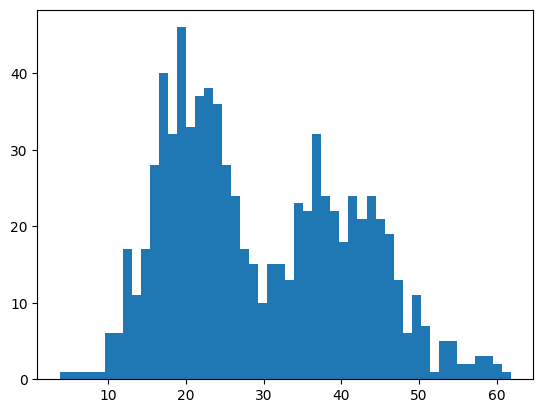

In [3]:
plt.hist(sample, bins = 50);

In [4]:
from sklearn.neighbors import KernelDensity

In [5]:
gauss_kernel = KernelDensity(bandwidth = 3, kernel = 'gaussian')


- `bandwidth` is the standard deviation applied to the underlying gaussian distribution (i.e at each data points)
- greater the bandwidth smoother the density curve
- lower bandwidth creates spikes

In [6]:
sample = sample.reshape((len(sample), 1))

In [7]:
gauss_kernel.fit(sample)

KernelDensity(bandwidth=3)

In [8]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

In [9]:
probabilities = gauss_kernel.score_samples(values)
probabilities = np.exp(probabilities)

- the `KernelDensity.score_sample(X)` returns log-density estimate, thus to cancel out log applying exponent to the probabilities

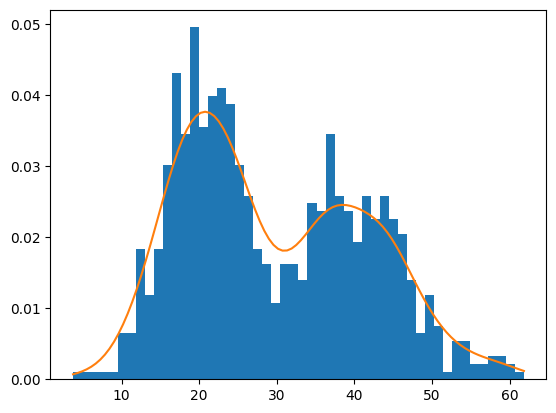

In [10]:
plt.hist(sample,bins = 50, density=True)
plt.plot(values, probabilities);

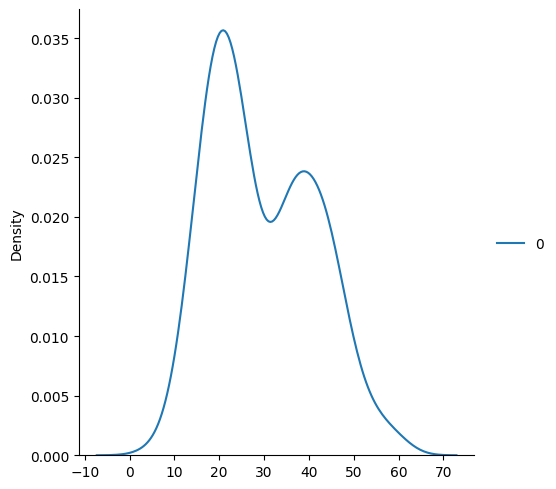

In [11]:
# seaborn's kdeplot
sns.displot(data = sample, kind = 'kde', bw_adjust = 1.2);

# Cumulative Distribution Function (CDF) of a PDF
- The CDF of a PDF at point x gives the probability of outcome less than or equal to x (i.e upto x)
- This can conclude that, The PDF at x is the 'probability density' at that point while CDF at point x is the 'probability' at that point

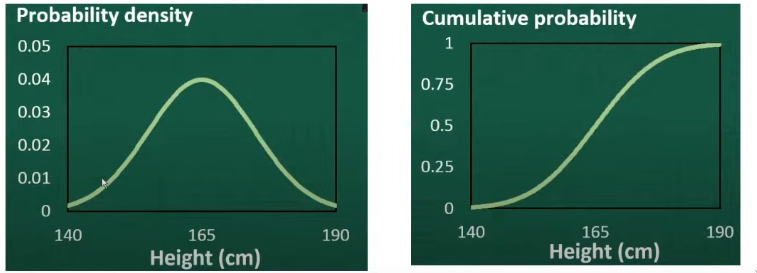

- From the figure, at $x = 165$, the PDF says the probability density of getting $165cm$ height is around $0.04$ while the CDF says the probability of getting $165cm$ height is around $0.5$ 

### Intuition
- The area under the curve of PDF gives the CDF of that PDF (performing integral to the PDF gives CDF)
- The slope of CDF gives the probability density (performing differentiation of the CDF gives PDF)